In [4]:
#GRID SEARCH CV - replaces the for loops in kfold cross_validation 5.0.ipynb. Simplifies the Kfold process

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [6]:
from sklearn.model_selection import GridSearchCV
#create a range of k
k_range = list(range(1,31))
print (k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [7]:
#param_grid is a dictionary containing the k_range (i.e. n_neighbors)
param_grid = dict(n_neighbors = k_range)

In [8]:
param_grid

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

In [9]:
#now instantiate 
knn = KNeighborsClassifier(n_neighbors = param_grid)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score = False)

In [10]:
#fit the model
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None,
           n_neighbors={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
           p=2, weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [12]:
#scores for each K (note each tuple has the mean score, std, and k value) in a dataframe
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


In [15]:
type(grid.cv_results_)

dict

In [16]:
grid.cv_results_['params'][0]

{'n_neighbors': 1}

In [17]:
#plot the mean scores with k
grid_mean_scores = grid.cv_results_['mean_test_score']

In [18]:
type(grid_mean_scores)

numpy.ndarray

Text(0, 0.5, 'Cross-Validated Accuracy')

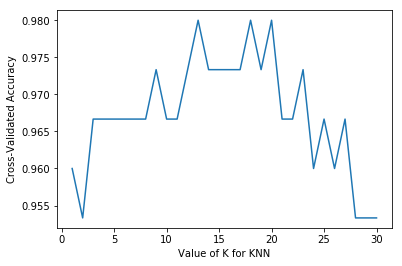

In [19]:
# plot the results - identical chart as above
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [20]:
# examine the best model - we could bypass the above by using the following attributes 
# note that the 3 different ns return the top score - its likelt grid search lists the first n it comes across
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')


In [21]:
#choosing the parameters to optimise accuracy - define parameter values
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance'] #exploring how k interacts with its neughbours default = uniform

In [22]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [23]:
# instantiate and fit the grid - for each k the model will evaluate for uniform and then distance 
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None,
           n_neighbors={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
           p=2, weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [24]:
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.953333,0.052068,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.960000,0.053333,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'distance'}"


In [26]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
# results as before

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


In [29]:
#predict OOS
print(grid.predict([[3,5,4,2]]))

[1]


In [30]:
#adjusting multiple parameters simultaneously can be computationally expense.
#Solution: RandomizedSearchCV which allows 'budget control'

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

In [35]:
print(param_dist)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [38]:
# n_iter controls the number of random searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False)
rand.fit(X, y)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 16}"
1,0.966667,0.033333,"{'weights': 'uniform', 'n_neighbors': 22}"
2,0.980000,0.030551,"{'weights': 'uniform', 'n_neighbors': 18}"
3,0.966667,0.044721,"{'weights': 'uniform', 'n_neighbors': 27}"
4,0.953333,0.042687,"{'weights': 'uniform', 'n_neighbors': 29}"
5,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 10}"
6,0.966667,0.044721,"{'weights': 'distance', 'n_neighbors': 22}"
7,0.973333,0.044222,"{'weights': 'uniform', 'n_neighbors': 14}"
8,0.973333,0.044222,"{'weights': 'distance', 'n_neighbors': 12}"
9,0.973333,0.032660,"{'weights': 'uniform', 'n_neighbors': 15}"


In [37]:
#examine the best model 
print(rand.best_score_)
print(rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}


In [40]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, return_train_score=False)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

[0.98, 0.973, 0.98, 0.973, 0.973, 0.98, 0.973, 0.98, 0.98, 0.98, 0.973, 0.973, 0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.98, 0.98]
